In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
max_features = 5000
maxlen = 300

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
element = 50
print("Primer ejemplo de entrenamiento:\n", x_train[element])
print("\nEtiqueta del primer ejemplo:\n", y_train[element])

Primer ejemplo de entrenamiento:
 [1, 13, 165, 219, 14, 20, 33, 6, 750, 17, 515, 17, 13, 2675, 4, 2, 61, 278, 59, 301, 107, 715, 13, 69, 115, 557, 33, 6, 750, 159, 42, 237, 57, 2, 17, 515, 17, 13, 557, 148, 715, 13, 144, 28, 43, 2, 2, 2, 8, 61, 2208, 5, 825, 344, 21, 57, 2, 13, 435, 11, 5, 296, 4, 20, 14, 20, 161, 97, 259, 11, 4, 750, 462, 24, 60, 280, 24, 60, 2, 669, 75, 1829, 50, 11, 2, 3542, 175, 747, 234, 42, 38, 294, 62, 2, 14, 20, 1870, 4, 311, 62, 2, 2, 95, 870, 50, 11, 2, 1100, 3542, 18, 160, 747, 234]

Etiqueta del primer ejemplo:
 0


In [ ]:
len( x_train[element])

113

In [ ]:
INDEX_FROM = 3
word_to_id = tf.keras.datasets.imdb.get_word_index()
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2

id_to_word = {value:key for key,value in word_to_id.items()}
print(' '.join(id_to_word[id] for id in x_train[element] ))

<START> i actually saw this movie at a theater as soon as i handed the <UNK> my money she said two words i had never heard at a theater before or since no <UNK> as soon as i heard those words i should have just <UNK> <UNK> <UNK> to my cash and gone home but no <UNK> i went in and watched the movie this movie didn't make anyone in the theater laugh not even once not even <UNK> mostly we sat there in <UNK> silence every ten minutes or so someone would <UNK> this movie sucks the audience would <UNK> <UNK> then sit there in <UNK> bored silence for another ten minutes


In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
x_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
len(x_train[2])

300

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Embedding(max_features, 32))
model.add(keras.layers.SimpleRNN(units=32))
model.add(keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
%%time
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
391/391 [==============================] - 191s 471ms/step - loss: 0.6531 - accuracy: 0.6235 - val_loss: 1.0070 - val_accuracy: 0.5042
Epoch 2/5
391/391 [==============================] - 142s 363ms/step - loss: 0.6326 - accuracy: 0.6595 - val_loss: 0.6049 - val_accuracy: 0.6584
Epoch 3/5
391/391 [==============================] - 135s 346ms/step - loss: 0.4698 - accuracy: 0.7786 - val_loss: 0.4501 - val_accuracy: 0.8036
Epoch 4/5
391/391 [==============================] - 132s 337ms/step - loss: 0.4041 - accuracy: 0.8180 - val_loss: 0.4642 - val_accuracy: 0.8020
Epoch 5/5
391/391 [==============================] - 130s 333ms/step - loss: 0.2811 - accuracy: 0.8859 - val_loss: 0.4232 - val_accuracy: 0.8050


In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

782/782 [==============================] - 21s 27ms/step - loss: 0.4232 - accuracy: 0.8050
Test Loss: 0.4232223331928253
Test Accuracy: 0.8050000071525574


In [ ]:
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']

In [ ]:
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

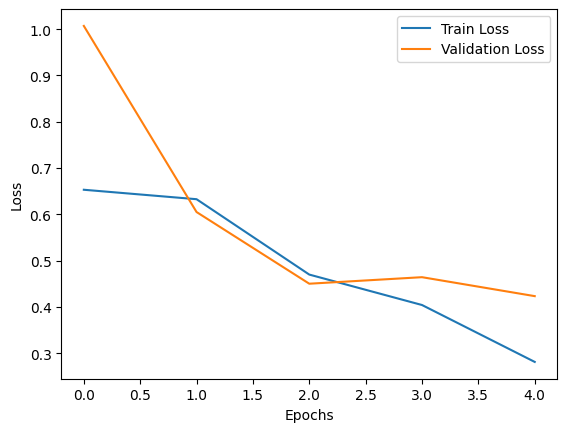

In [ ]:
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

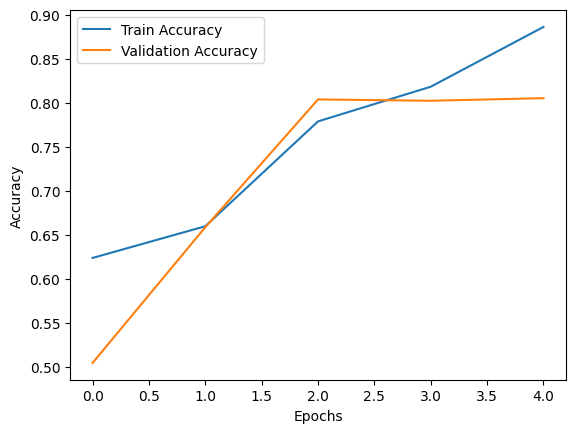

In [ ]:
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Save and Load Model

In [ ]:
model.save('my_model.h5')

In [ ]:
from tensorflow.keras.models import load_model

loaded_model = load_model('my_model.h5')

In [ ]:
loss, accuracy = loaded_model.evaluate(x_test, y_test)

782/782 [==============================] - 29s 37ms/step - loss: 0.4232 - accuracy: 0.8050


In [ ]:
print('Loss:', loss)
print('Accuracy:', accuracy)

Loss: 0.4232223331928253
Accuracy: 0.8050000071525574


# Embeddings

In [ ]:
embeddings = model.layers[0].get_weights()[0]

In [ ]:
word = "good"
word_index = word_to_id[word]

In [ ]:
word_embedding = embeddings[word_index]

print("Embedding para la palabra 'good':\n", word_embedding)

Embedding para la palabra 'good':
 [ 0.1169604  -0.03221298  0.0186439  -0.03642695 -0.01770669 -0.0557798
  0.00263729  0.01348831  0.04839774 -0.04072893 -0.01429759  0.00742333
  0.07344515  0.01934474  0.03398033 -0.07670914  0.04790408 -0.05095636
 -0.05815758 -0.06424545 -0.01122505  0.04626911 -0.05796796 -0.10187406
  0.00029391 -0.07608778 -0.05380784  0.04988053  0.033471   -0.07049397
 -0.06805198 -0.03074729]


In [ ]:
len(word_embedding)

32